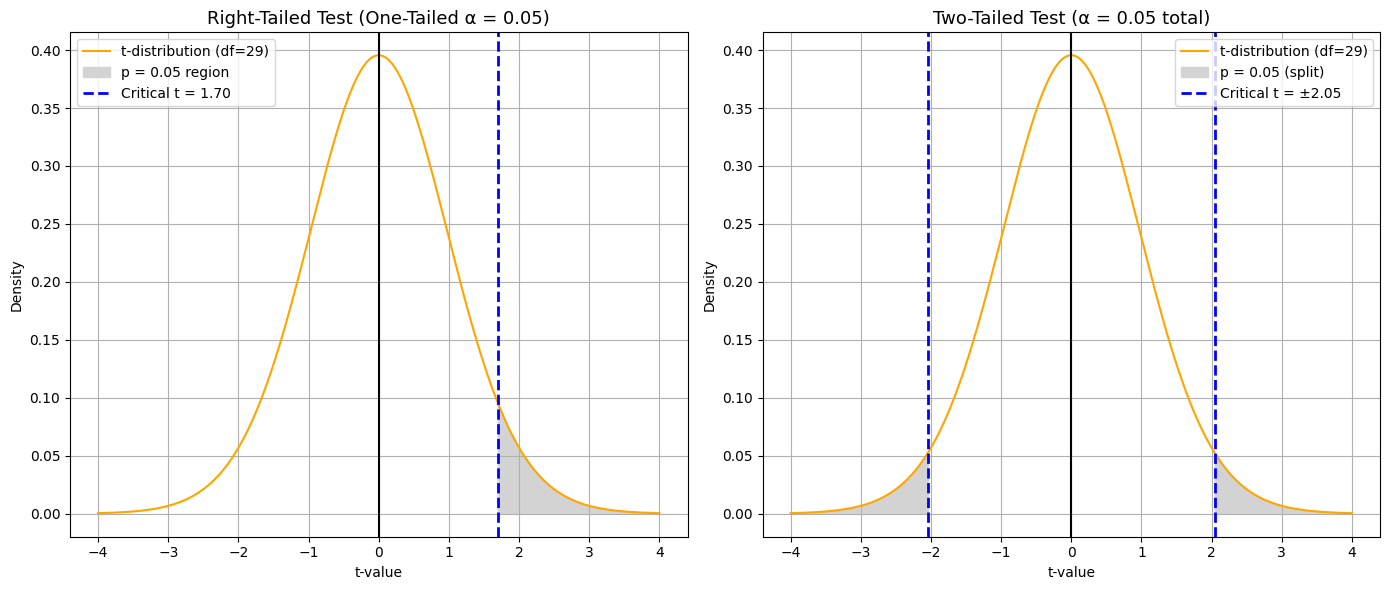

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
df = 29
alpha = 0.05

# Critical t-values
t_crit_one = stats.t.ppf(1 - alpha, df)
t_crit_two = stats.t.ppf(1 - alpha / 2, df)

# t-distribution
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
titles = ['Right-Tailed Test (One-Tailed α = 0.05)', 'Two-Tailed Test (α = 0.05 total)']

for i, ax in enumerate(axes):
    ax.plot(x, y, color='orange', label='t-distribution (df=29)')
    ax.axvline(0, color='black', linestyle='-')

    if i == 0:
        # Right-tailed (single tail)
        x_fill = np.linspace(t_crit_one, 4, 100)
        y_fill = stats.t.pdf(x_fill, df)
        ax.fill_between(x_fill, y_fill, color='lightgray', label='p = 0.05 region')
        ax.axvline(t_crit_one, color='blue', linestyle='--', linewidth=2, label=f'Critical t = {t_crit_one:.2f}')
    else:
        # Two-tailed (split)
        x_fill_right = np.linspace(t_crit_two, 4, 100)
        x_fill_left = np.linspace(-4, -t_crit_two, 100)
        y_right = stats.t.pdf(x_fill_right, df)
        y_left = stats.t.pdf(x_fill_left, df)
        ax.fill_between(x_fill_right, y_right, color='lightgray')
        ax.fill_between(x_fill_left, y_left, color='lightgray', label='p = 0.05 (split)')
        ax.axvline(t_crit_two, color='blue', linestyle='--', linewidth=2, label=f'Critical t = ±{t_crit_two:.2f}')
        ax.axvline(-t_crit_two, color='blue', linestyle='--', linewidth=2)

    ax.set_title(titles[i], fontsize=13)
    ax.set_xlabel('t-value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()